In [4]:
%%capture
%run ../AROME/arome_plots.ipynb
%run ../radiosonde_and_wrf.ipynb
%run ../ICON/icon_plots.ipynb
%run ../ICON/icon2TE_plots.ipynb 
%run ../UM/ukmo_plots.ipynb

#%run D:/codes/arome_plots.ipynb
#%run D:/codes/radiosonde_and_wrf.ipynb #obs und wrf_acinn
#%run D:/codes/icon_plots.ipynb
#%run D:/codes/icon2TE_plots.ipynb
#%run D:/codes/ukmo_plots.ipynb

In [17]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy.constants import g
from metpy.units import units
from metpy.calc import potential_temperature
from metpy.calc import pressure_to_height_std
from metpy.calc import height_to_pressure_std
from metpy.calc import relative_humidity_from_dewpoint
import sys
np.set_printoptions(threshold=sys.maxsize)

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import stem
from matplotlib.pyplot import subplots

In [19]:
model = ['OBS','WRF','AROME','UM','ICON','ICON2TE']

* _surf: at the surface
* _max: where the temperature is max
* _seg: at the Hafelekar 

# CAP depth

* what is the depth?
* strength of CAP (surface-T_max) 
* Annahme Hafelekar: 2278 m (highest HOBO)

In [22]:
height_seegrube = 2278
p_seg = height_to_pressure_std(height_seegrube * units('m')).magnitude
press = [df_obs['pressure'], df_wrf_acinn['pressure'], df_arome['pressure'], data_ukmo['pressure'], df_icon['pressure'], df_icon2TE['pressure']]

In [23]:
#find nearest value in df to a given value
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#### OBS

In [24]:
df_obs_convolved_T = np.convolve(np.ones(35)/35, df_obs["temperature"].values, 'same')

In [25]:
obs_T_surf = df_obs['temperature'].where(df_obs['pressure'] == np.max(df_obs['pressure'])).dropna(dim='height').values
obs_T_max = np.max(df_obs_convolved_T)
obs_T_seg = df_obs['temperature'].where(df_obs['pressure'] == find_nearest(df_obs['pressure'], value=p_seg) * units('hPa')).dropna(dim='height').values

obs_p_of_T_max = df_obs['pressure'].where(df_obs_convolved_T == obs_T_max).dropna(dim='height').values
obs_p_surf = np.max(df_obs['pressure']).values
obs_z_surf = np.min(df_obs['height']).values
obs_z_of_T_max = df_obs.height.where(df_obs_convolved_T == obs_T_max).dropna(dim='height').values

#### WRF_ACINN

In [26]:
a = df_wrf_acinn['temperature'].where(df_wrf_acinn['pressure'] == np.max(df_wrf_acinn['pressure'])).values
wrf_acinn_T_surf = a[~np.isnan(a)]
wrf_acinn_T_max = np.max(df_wrf_acinn["temperature"].values)
b = df_wrf_acinn['temperature'].where(df_wrf_acinn['pressure'] == find_nearest(df_wrf_acinn['pressure'], value=p_seg)).values
wrf_acinn_T_seg = b[~np.isnan(b)]

c = df_wrf_acinn['pressure'].where(df_wrf_acinn['temperature'] == wrf_acinn_T_max).values
wrf_acinn_p_of_T_max = c[~np.isnan(c)]
wrf_acinn_p_surf = np.max(df_wrf_acinn['pressure']).values

wrf_acinn_z_surf = np.min(df_wrf_acinn.z).values
d = df_wrf_acinn.z.where(df_wrf_acinn['temperature'] == wrf_acinn_T_max).values
wrf_acinn_z_of_T_max = d[~np.isnan(c)]

#### AROME

In [27]:
a = df_arome['temperature'].where(df_arome['pressure'] == np.max(df_arome['pressure'])).values
arome_T_surf = a[~np.isnan(a)]
arome_T_max = np.max(df_arome["temperature"].values)
b = df_arome['temperature'].where(df_arome['pressure'] == find_nearest(df_arome['pressure'], value=p_seg)* units('hPa')).values
arome_T_seg = b[~np.isnan(b)]

c = df_arome['pressure'].where(df_arome['temperature'] == find_nearest(df_arome['temperature'], value=arome_T_max)* units('degree_Celsius')).values
arome_p_of_T_max = c[~np.isnan(c)]
arome_p_surf = np.max(df_arome['pressure']).values

arome_z_surf = np.min(df_arome.height).values
d = df_arome.height.where(df_arome['temperature'] == find_nearest(df_arome['temperature'], value=arome_T_max)* units('degree_Celsius')).values
arome_z_of_T_max = d[~np.isnan(c)]


#### UM

In [28]:
a = data_ukmo['temperature'].where(data_ukmo['pressure'] == np.max(data_ukmo['pressure'])).values
ukmo_T_surf = a[~np.isnan(a)]
ukmo_T_max = np.max(data_ukmo["temperature"].values)
b = data_ukmo['temperature'].where(data_ukmo['pressure'] == find_nearest(data_ukmo['pressure'], value=p_seg)).values
ukmo_T_seg = b[~np.isnan(b)]

c = data_ukmo['pressure'].where(data_ukmo['temperature'] == ukmo_T_max).values
ukmo_p_of_T_max = c[~np.isnan(c)]
ukmo_p_surf = np.max(data_ukmo['pressure'])

ukmo_z_surf = np.min(data_ukmo.geopotential_height)
d = data_ukmo.geopotential_height.where(data_ukmo['temperature'] == ukmo_T_max).values
ukmo_z_of_T_max = d[~np.isnan(c)]

#### ICON

In [29]:
a = df_icon['temperature'].where(df_icon['pressure'] == np.max(df_icon['pressure'])).values
icon_T_surf = a[~np.isnan(a)]
icon_T_max = np.max(df_icon["temperature"].values)
b = df_icon['temperature'].where(df_icon['pressure'] == find_nearest(df_icon['pressure'], value=p_seg)).values
icon_T_seg = b[~np.isnan(b)]

c = df_icon['pressure'].where(df_icon['temperature'] == icon_T_max).values
icon_p_of_T_max = c[~np.isnan(c)]
icon_p_surf = np.max(df_icon['pressure']).values

icon_z_surf = pressure_to_height_std(icon_p_surf * units('hPa')).magnitude * 1000 #m
icon_z_of_T_max = pressure_to_height_std(icon_p_of_T_max * units('hPa')).magnitude * 1000 #m


#### ICON2TE

In [30]:
a = df_icon2TE['temperature'].where(df_icon2TE['pressure'] == np.max(df_icon2TE['pressure'])).values
icon2TE_T_surf = a[~np.isnan(a)]
icon2TE_T_max = np.max(df_icon2TE["temperature"].values)
b = df_icon2TE['temperature'].where(df_icon2TE['pressure'] == find_nearest(df_icon2TE['pressure'], value=p_seg)).values
icon2TE_T_seg = b[~np.isnan(b)]

c = df_icon2TE['pressure'].where(df_icon2TE['temperature'] == icon2TE_T_max).values
icon2TE_p_of_T_max = c[~np.isnan(c)]
icon2TE_p_surf = np.max(df_icon2TE['pressure']).values

icon2TE_z_surf = pressure_to_height_std(icon2TE_p_surf * units('hPa')).magnitude * 1000 #m
icon2TE_z_of_T_max = pressure_to_height_std(icon2TE_p_of_T_max * units('hPa')).magnitude * 1000 #m


In [31]:
z_surf = np.array([obs_z_surf, wrf_acinn_z_surf, arome_z_surf, ukmo_z_surf, icon_z_surf, icon2TE_z_surf])
z_max = np.array([obs_z_of_T_max, wrf_acinn_z_of_T_max, arome_z_of_T_max, ukmo_z_of_T_max, icon_z_of_T_max, icon2TE_z_of_T_max]).T.flatten()
z_seg = np.ones(6) * height_seegrube
p_surf = np.array([obs_p_surf, wrf_acinn_p_surf, arome_p_surf, ukmo_p_surf, icon_p_surf, icon2TE_p_surf])
p_max = np.array([obs_p_of_T_max, wrf_acinn_p_of_T_max, arome_p_of_T_max, ukmo_p_of_T_max, icon_p_of_T_max, icon2TE_p_of_T_max]).T.flatten()


depth = pd.DataFrame({'model': model,
                      'p_surf [hPa]': p_surf,
                      'p_max [hPa]': p_max,
                      'p_seg [hPa]': p_seg,
                      'p_diff_seg_surf [hPa]': p_surf-p_seg,
                      'p_diff_max_surf [hPa]': p_surf-p_max,
                      'z_surf [m]': z_surf,
                      'z_max [m]': z_max,
                      'z_seg [m]': z_seg,
                      'z_diff_seg_surf [m]': z_seg-z_surf,
                      'z_diff_max_surf [m]': z_max-z_surf,
                        }).set_index('model')
depth


,p_surf [hPa],p_max [hPa],p_seg [hPa],p_diff_seg_surf [hPa],p_diff_max_surf [hPa],z_surf [m],z_max [m],z_seg [m],z_diff_seg_surf [m],z_diff_max_surf [m]
model,,,,,,,,,,
OBS,962.300000,854.600000,767.775483,194.524517,107.700000,578.000000,1572.000000,2278.0,1700.000000,994.000000
WRF,958.272034,938.135925,767.775483,190.496551,20.136108,592.576111,774.197388,2278.0,1685.423889,181.621277
AROME,955.062073,924.994751,767.775483,187.286590,30.067322,627.787598,899.492249,2278.0,1650.212402,271.704651
UM,957.469971,941.875000,767.775483,189.694488,15.594971,605.625000,745.375000,2278.0,1672.375000,139.750000
ICON,959.588684,957.208252,767.775483,191.813202,2.380432,456.337674,477.054901,2278.0,1821.662326,20.717227
ICON2TE,959.912170,937.698364,767.775483,192.136688,22.213806,453.525508,648.444275,2278.0,1824.474492,194.918767


# Brunt-Väisälä-Frequency

$N = \sqrt{\frac{g}{\theta} \frac{\delta \theta}{\delta z}}$   with z coordinates

###### Non-dimensional mountain height (Froud-number) H

$H = \frac{N_m h}{u_n}$

Pressure at Seegrube = 800 hPa = 2278.78 m

In [32]:
def bv_freq(theta0, theta1, z0, z1):
    theta_mean = (theta1 + theta0)/2
    N = np.sqrt(g/theta_mean * (theta1-theta0)/(z1-z0))
    return N #* units('1/s')

#### OBS

In [33]:
obs_th_surf = potential_temperature(np.max(df_obs['pressure']), obs_T_surf*units('degree_Celsius')).magnitude
obs_th_max = potential_temperature(obs_p_of_T_max*units('hPa'), obs_T_max*units('degree_Celsius')).magnitude
obs_th_seg = potential_temperature(p_seg*units('hPa'), obs_T_seg*units('degree_Celsius')).magnitude


#### WRF_ACINN

In [34]:
wrf_acinn_th_surf = potential_temperature(np.max(df_wrf_acinn['pressure'])*units('hPa'), wrf_acinn_T_surf*units('degree_Celsius'))
wrf_acinn_th_max = potential_temperature(wrf_acinn_p_of_T_max*units('hPa'), wrf_acinn_T_max*units('degree_Celsius'))
wrf_acinn_th_seg = potential_temperature(p_seg*units('hPa'), wrf_acinn_T_seg*units('degree_Celsius'))


#### AROME

In [35]:
arome_th_surf = potential_temperature(np.max(df_arome['pressure']), arome_T_surf*units('degree_Celsius'))
arome_th_max = potential_temperature(arome_p_of_T_max*units('hPa'), arome_T_max*units('degree_Celsius'))
arome_th_seg = potential_temperature(p_seg*units('hPa'), arome_T_seg*units('degree_Celsius'))


#### UM

In [36]:
ukmo_th_surf = potential_temperature(np.max(data_ukmo['pressure'])*units('hPa'), ukmo_T_surf*units('degree_Celsius'))
ukmo_th_max = potential_temperature(ukmo_p_of_T_max*units('hPa'), ukmo_T_max*units('degree_Celsius'))
ukmo_th_seg = potential_temperature(p_seg*units('hPa'), ukmo_T_seg*units('degree_Celsius'))


#### ICON

In [37]:
icon_th_surf = potential_temperature(np.max(df_icon['pressure'])*units('hPa'), icon_T_surf*units('degree_Celsius'))
icon_th_max = potential_temperature(icon_p_of_T_max*units('hPa'), icon_T_max*units('degree_Celsius'))
icon_th_seg = potential_temperature(p_seg*units('hPa'), icon_T_seg*units('degree_Celsius'))


#### ICON2TE

In [38]:
icon2TE_th_surf = potential_temperature(np.max(df_icon2TE['pressure'])*units('hPa'), icon2TE_T_surf*units('degree_Celsius'))
icon2TE_th_max = potential_temperature(icon2TE_p_of_T_max*units('hPa'), icon2TE_T_max*units('degree_Celsius'))
icon2TE_th_seg = potential_temperature(p_seg*units('hPa'), icon2TE_T_seg*units('degree_Celsius'))


In [39]:
th_surf = np.array([obs_th_surf, wrf_acinn_th_surf, arome_th_surf, ukmo_th_surf, icon_th_surf, icon2TE_th_surf])
th_max = np.array([obs_th_max, wrf_acinn_th_max, arome_th_max, ukmo_th_max, icon_th_max, icon2TE_th_max])
th_seg = np.array([obs_th_seg, wrf_acinn_th_seg, arome_th_seg, ukmo_th_seg, icon_th_seg, icon2TE_th_seg])


N1 = np.zeros(6)
N2 = np.zeros(6)
for i in range(6):
    N1[i] = bv_freq(th_surf[i], th_seg[i], z_surf[i], z_seg[i])
    N2[i] = bv_freq(th_surf[i], th_max[i], z_surf[i], z_max[i])

brunt_väisälä_freq = pd.DataFrame({'model': model,
                               'bv_freq_seg_surf [$s^{-1}$]': N1,
                               'bv_freq_maxT_surf [$s^{-1}$]': N2,
                                }).set_index('model')
brunt_väisälä_freq


,bv_freq_seg_surf [$s^{-1}$],bv_freq_maxT_surf [$s^{-1}$]
model,,
OBS,0.020942,0.024330
WRF,0.014575,0.024497
AROME,0.017743,0.029437
UM,0.014074,0.021153
ICON,0.015466,0.077470
ICON2TE,0.014786,0.022744


In [40]:
bv_freq(th_surf, th_max, z_surf, z_max)

array([[0.02433006, 0.05691845, 0.04653588, 0.06488743, 0.16852745,
        0.05494265],
       [0.01047157, 0.02449748, 0.02002886, 0.0279273 , 0.07253356,
        0.0236471 ],
       [0.01539044, 0.03600484, 0.02943715, 0.04104577, 0.10660522,
        0.03475501],
       [0.00793137, 0.01855486, 0.01517025, 0.02115267, 0.05493832,
        0.01791077],
       [0.0111843 , 0.02616488, 0.02139211, 0.02982814, 0.07747049,
        0.02525662],
       [0.01007179, 0.02356223, 0.01926421, 0.02686111, 0.06976443,
        0.02274432]])

# Bulk Temperature Gradient

### $\frac{T_1 - T_0}{z_1 - z_0}$

In [41]:
T_surf = np.array([obs_T_surf, wrf_acinn_T_surf, arome_T_surf, ukmo_T_surf, icon_T_surf, icon2TE_T_surf]).T.flatten()
T_max = np.array([obs_T_max, wrf_acinn_T_max, arome_T_max, ukmo_T_max, icon_T_max, icon2TE_T_max])
T_seg = np.array([obs_T_seg, wrf_acinn_T_seg, arome_T_seg, ukmo_T_seg, icon_T_seg, icon2TE_T_seg]).T.flatten()


# Bulk Temperature Gradient between Seegrube and Surface (Temperature in °C, height in m)
(T_seg - T_surf) / (z_seg - z_surf)
# Bulk Temperature Gradient between Max. T and Surface (Temperature in °C, height in m)
(T_max - T_surf) / (z_max - z_surf)

bulk_temp_grad = pd.DataFrame({'model': model,
                               'bulk_T_grad_seg_surf [$°Cm^{-1}$]': (T_seg - T_surf) / (z_seg - z_surf),
                               'bulk_T_grad_max_surf [$°Cm^{-1}$]': (T_max - T_surf) / (z_max - z_surf),
                               'bulk_theta_grad_seg_surf [$Km^{-1}$]': (th_seg - th_surf).T.flatten() / (z_seg - z_surf),
                               'bulk_theta_grad_max_surf [$Km^{-1}$]': (th_max - th_surf).T.flatten() / (z_max - z_surf),
                                }).set_index('model')
bulk_temp_grad


,bulk_T_grad_seg_surf [$°Cm^{-1}$],bulk_T_grad_max_surf [$°Cm^{-1}$],bulk_theta_grad_seg_surf [$Km^{-1}$],bulk_theta_grad_max_surf [$Km^{-1}$]
model,,,,
OBS,0.001906,0.007428,0.013120,0.017563
WRF,-0.004540,0.008058,0.006461,0.018018
AROME,-0.001616,0.015756,0.009547,0.025894
UM,-0.004999,0.003492,0.006023,0.013417
ICON,-0.003010,0.166909,0.007248,0.178966
ICON2TE,-0.003614,0.005323,0.006637,0.015465


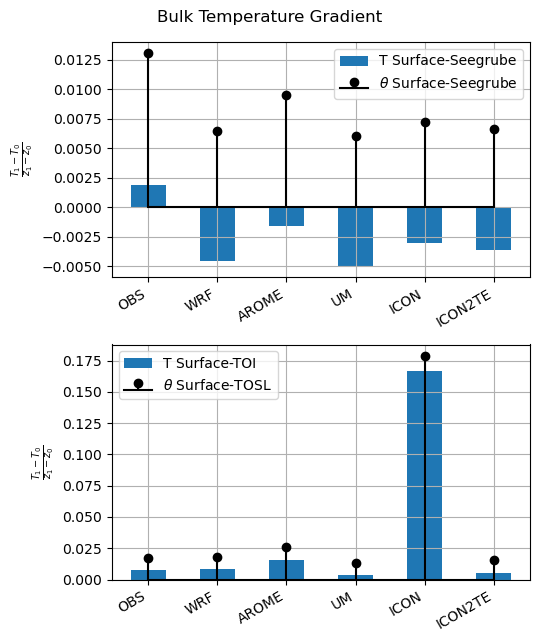

In [42]:
f, ax = plt.subplots(2, 1, figsize = (5.5,6.5))
ax[0].bar(model, (T_seg - T_surf) / (z_seg - z_surf), width=0.5, label= 'T Surface-Seegrube')
ax[0].stem(model, (th_seg - th_surf).T.flatten() / (z_seg - z_surf), 'k', markerfmt='ko', basefmt='k',label= r'$\theta$ Surface-Seegrube')

ax[1].bar(model, (T_max - T_surf) / (z_max - z_surf), width=0.5, label= 'T Surface-TOI')
ax[1].stem(model, (th_max - th_surf).T.flatten() / (z_max - z_surf), 'k', markerfmt='ko', basefmt='k', label= r'$\theta$ Surface-TOSL')


titel = [r'$\frac{T_1 - T_0}{z_1 - z_0}$', r"$\frac{T_1 - T_0}{z_1 - z_0}$"]
legend = ['Surface-Seegrube', 'Surface-TOI']
for i in range(2):
    ax[i].set_ylabel(titel[i])
    plt.setp(ax[i].get_xticklabels(), rotation=30, horizontalalignment='right') #rotate x_labels
    ax[i].grid()
    ax[i].legend()
plt.suptitle('Bulk Temperature Gradient')
plt.tight_layout() #stop figures from overlapping


# Valley Heat Deficit

use absolute temperature T by definition

#### OBS

In [45]:
#bulk valley heat deficit
def valley_heat_def(T0, T1, z0, z1):
    """
    from Largeron and Staquet 2016, bulk approach for valley heat deficit
    """
    gamma = -0.0098 #* units('K*m**(-1)')
    rho_0 = 1.2 #* units('kg*m**(-3)')
    c_p = 1005 #* units('J*kg**(-1)*K**(-1)')
    H = 0.5 * rho_0 * c_p * (z1 - z0)**2 * ((T1 - T0)/(z1 - z0) + abs(gamma))
    return H * units('J*m**(-2)')

In [46]:
# bulk valley heat deficit between Seegrube and Surface (Temperature in °C, not pot.T!, height in z)
valley_heat_def(T_surf, T_seg, z_surf, z_seg)
# bulk valley heat deficit between Tmax and Surface (Temperature in °C, not pot.T!, height in z)
valley_heat_def(T_surf, T_max, z_surf, z_max)

valley_heat_deficit = pd.DataFrame({'H_seg_surf $[Jm^{-2}]$': valley_heat_def(T_surf, T_seg, z_surf, z_seg),
                                    'H_max_surf $[Jm^{-2}]$': valley_heat_def(T_surf, T_max, z_surf, z_max),
                                    'model': model
                                    }).set_index('model')
valley_heat_deficit

,H_seg_surf $[Jm^{-2}]$,H_max_surf $[Jm^{-2}]$
model,,
OBS,2.039949e+07,1.026419e+07
WRF,9.009897e+06,3.552117e+05
AROME,1.343841e+07,1.137628e+06
UM,8.097105e+06,1.565349e+05
ICON,1.358750e+07,4.573393e+04
ICON2TE,1.241760e+07,3.464693e+05


# Absolute Temperature Difference

In [47]:
th_max[0]- th_max
#T_surf

array([[0.        ],
       [3.61820985],
       [3.1255951 ],
       [4.68955995],
       [5.40852357],
       [5.00138856]])

In [48]:
absolute_T_differcences = pd.DataFrame({'abs. T diff. seg-surf $[°C]$': T_seg - T_surf,
                                        'abs. T diff. Tmax-surf $[°C]$': T_max - T_surf,
                                        'abs. theta diff. seg-surf $[K]$': (th_seg - th_surf).T.flatten(),
                                        'abs. theta diff. Tmax-surf $[K]$': (th_max - th_surf).T.flatten(),
                                        'model': model
                                       }).set_index('model')
absolute_T_differcences


,abs. T diff. seg-surf $[°C]$,abs. T diff. Tmax-surf $[°C]$,abs. theta diff. seg-surf $[K]$,abs. theta diff. Tmax-surf $[K]$
model,,,,
OBS,3.240000,7.383429,22.304748,17.457682
WRF,-7.651855,1.463531,10.888916,3.272491
AROME,-2.667206,4.280914,15.755127,7.035645
UM,-8.359955,0.488007,10.071899,1.875000
ICON,-5.482727,3.457886,13.204163,3.707672
ICON2TE,-6.592743,1.037567,12.109375,3.014496


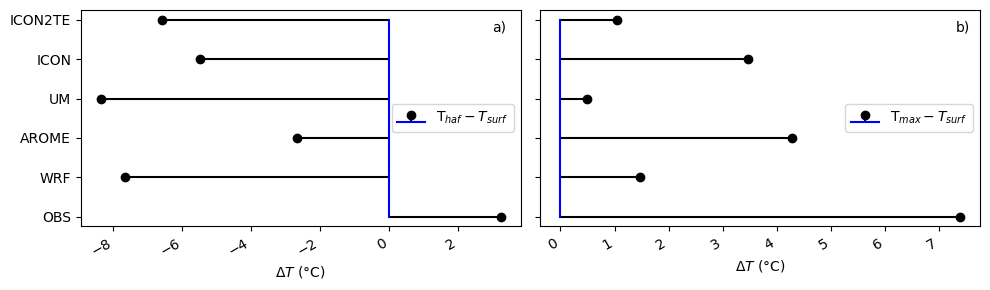

In [52]:
f, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10,3))
ax[0].stem(model, T_seg - T_surf, 'k', markerfmt='ko', basefmt='b',
              label=r'T$_{haf} - T_{surf}$', orientation='horizontal')
ax[1].stem(model, T_max - T_surf, 'k', markerfmt='ko', basefmt='b',
              label=r'T$_{max} - T_{surf}$', orientation='horizontal')


# for i in range(2):
for i in range(2):
    ax[i].set_xlabel('$\Delta T$ (°C)')
    plt.setp(ax[i].get_xticklabels(), rotation=30, horizontalalignment='right') #rotate x_labels
    #ax[i].grid()
    ax[i].legend(loc=7)
    #ax[i].set_yscale('log')

ax[0].text(3, 4.7, 'a)')
ax[1].text(7.3, 4.7, 'b)')

plt.tight_layout() #stop figures from overlapping 
plt.savefig(dir_PLOTS + "/results/T_diff.svg")

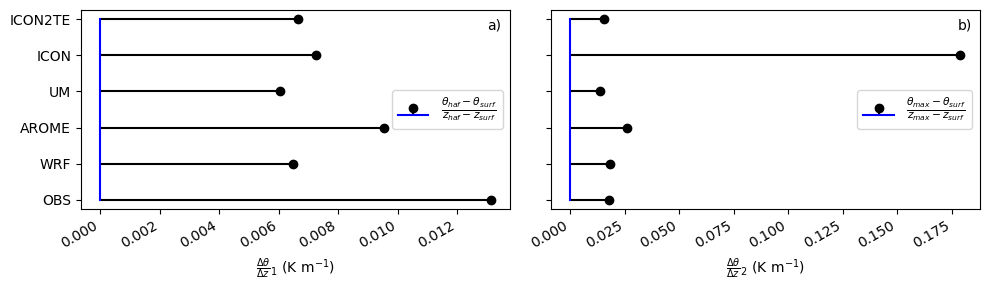

In [53]:
f, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10,3))
ax[0].stem(model, (th_seg - th_surf).T.flatten() / (z_seg - z_surf), 'k', markerfmt='ko', basefmt='b',
              label=r'$\frac{\theta_{haf} - \theta_{surf}}{z_{haf} - z_{surf}}$', orientation='horizontal')
ax[1].stem(model, (th_max - th_surf).T.flatten() / (z_max - z_surf), 'k', markerfmt='ko', basefmt='b',
              label=r'$\frac{\theta_{max} - \theta_{surf}}{z_{max} - z_{surf}}$', orientation='horizontal')

ax[0].set_xlabel(r'$\frac{\Delta \theta}{\Delta z}_1$ (K m$^{-1}$)')
ax[1].set_xlabel(r'$\frac{\Delta \theta}{\Delta z}_2$ (K m$^{-1}$)')

for i in range(2):
    plt.setp(ax[i].get_xticklabels(), rotation=30, horizontalalignment='right') #rotate x_labels
    ax[i].legend(loc=7, fontsize="11")

ax[0].text(0.013, 4.7, 'a)')
ax[1].text(.1779, 4.7, 'b)')

plt.tight_layout() #stop figures from overlapping 
plt.savefig(dir_PLOTS + "/results/th_diff.svg")

## Different Plots

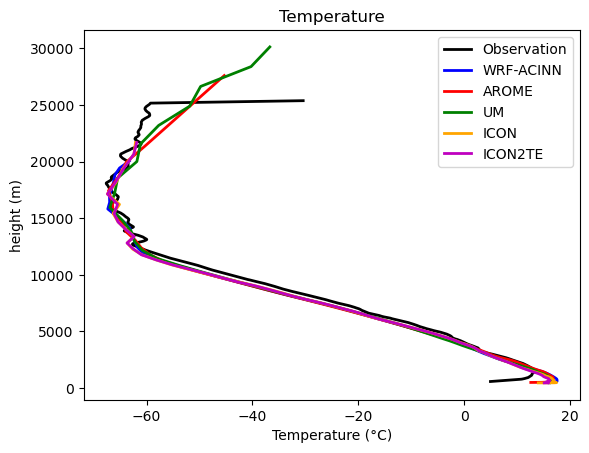

In [50]:
fig = plt.figure()
plt.plot(np.convolve(np.ones(35)/35, df_obs["temperature"].values, 'same')[::-1],df_obs.height[::-1], color=colordict["RADIOSONDE"], label="Observation", linewidth=2)
plt.plot(df_wrf_acinn["temperature"].values, pressure_to_height_std(df_wrf_acinn["pressure"].values *units('hPa'))* 1000,color=colordict["WRF_ACINN"], label="WRF-ACINN",linewidth=2)
plt.plot(df_arome["temperature"].values, pressure_to_height_std(df_arome["pressure"].values *units('hPa'))* 1000, color=colordict["AROME"], label="AROME", linewidth=2)
plt.plot(data_ukmo["temperature"].values[::-1], pressure_to_height_std(data_ukmo["pressure"].values[::-1] *units('hPa'))* 1000, color=colordict["UKMO"],label="UM", linewidth=2)
plt.plot(df_icon["temp"].values-273.15, pressure_to_height_std(df_icon["pressure"].values *units('hPa'))* 1000, color=colordict["ICON"], label="ICON", linewidth=2)
plt.plot(df_icon2TE["temp"].values-273.15, pressure_to_height_std(df_icon2TE["pressure"].values *units('hPa'))* 1000, color='m', label="ICON2TE", linewidth=2)

plt.title(f"Temperature")
plt.xlabel('Temperature (°C)')
plt.ylabel('height (m)')
#plt.yscale('log')

plt.legend();

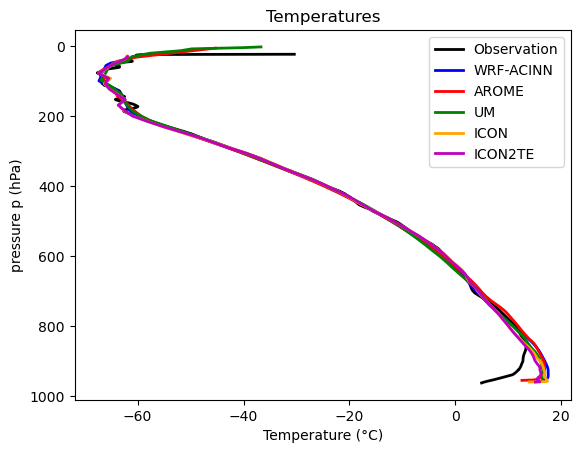

In [51]:
fig = plt.figure()
plt.plot(np.convolve(np.ones(35)/35, df_obs["temperature"].values, 'same')[::-1],df_obs["pressure"].values[::-1], color=colordict["RADIOSONDE"], label="Observation", linewidth=2)
plt.plot(df_wrf_acinn["temperature"].values, df_wrf_acinn["pressure"].values,color=colordict["WRF_ACINN"], label="WRF-ACINN",linewidth=2)
plt.plot(df_arome["temperature"].values, df_arome["pressure"].values, color=colordict["AROME"], label="AROME", linewidth=2)
plt.plot(data_ukmo["temperature"].values[::-1], data_ukmo["pressure"].values[::-1], color=colordict["UKMO"],label="UM", linewidth=2)
plt.plot(df_icon["temp"].values-273.15, df_icon["pressure"].values, color=colordict["ICON"], label="ICON", linewidth=2)
plt.plot(df_icon2TE["temp"].values-273.15, df_icon2TE["pressure"].values, color='m', label="ICON2TE", linewidth=2)

plt.title(
    f"Temperatures")
plt.gca().invert_yaxis()
plt.xlabel('Temperature (°C)')
plt.ylabel('pressure p (hPa)')

plt.legend();